<a href="https://colab.research.google.com/github/jherrerae/Food_Sales_Prediction/blob/main/Food_Sales_Prediction_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Jose Herrera
Food Sales Prediction Project
```



# **Week 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
filename='/content/drive/MyDrive/Coding Dojo/Classes/Datasets/sales_predictions.csv'

df=pd.read_csv(filename)
df_week5=pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Week 2**

Data Cleaning

In [ ]:
#number of rows and columns
df.shape

(8523, 12)

In [ ]:
df.info()
#Analyze data types and where are missing values.
#Missing values are on Item_Weight, Outlet_Size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
##Remove duplicates
df.duplicated().sum()

#There are no duplicated values in the dataset.

0

In [ ]:
#Missing values are in columns 1,8.
#1 is weight which is numerical, 17% of the data is missing
#2 is Outlet Size which is categorical, 29% of the data is missing

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



```
##Process to fill missing values Outlet_Size
 ```



In [ ]:
df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'],dropna=False)['Item_Fat_Content'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           528
                   Tier 3                NaN             555
Supermarket Type1  Tier 1                Medium          930
                                         Small           930
                   Tier 2                Small           930
                                         NaN            1855
                   Tier 3                High            932
Supermarket Type2  Tier 3                Medium          928
Supermarket Type3  Tier 3                Medium          935
Name: Item_Fat_Content, dtype: int64

Based in the groupby done above. The missing values for Outlet_Size are in the following groups Grocery Store_Tier 3 and Supermarket Type1_Tier2.
The following process will be follow to fill the values:

Since Outlet_Size is a categorical value, we will use the mode and some groups to fill it out.

First, for Grocery Store given that for Tier 3 we don't have any data we will use the other Tier inside grocery store which are Tier 1 and everything is Small. Therefore for Grocery Store_Tier3 all the missing values will be small.

Second, for Supermarket Type1, everything inside Tier 2 is small and if we add Tire 1 and 3 still the mode is Small. Therefore for Supermarket Type1_Tier 2 all the missing values will be small.

In [ ]:
def fill_missing_values(Type,location,size):
  if (Type=="Grocery Store" and location=="Tier 3"):
      return "Small"
  elif (Type=="Supermarket Type1" and location=="Tier 2"):
      return "Small"
  else:
    return size


df['Outlet_Size'] = df.apply(lambda x: fill_missing_values(x['Outlet_Type'],x['Outlet_Location_Type'],x['Outlet_Size']),axis=1)


In [ ]:
df.isna().sum()
#Missing values replaced for Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
filter_NAN_weigth=df["Item_Weight"].isnull()

df_NAN_weight=df[filter_NAN_weigth]


df_NAN_weight.shape

df_NAN_weight.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Establishment_Year  Outlet_Type        Outlet_Location_Type
1985                       Grocery Store      Tier 1                  528
                           Supermarket Type3  Tier 3                  935
Name: Outlet_Type, dtype: int64

In [ ]:
filter_weigth=df["Item_Weight"].notnull()

df_weight=df[filter_weigth]

df_weight

df_weight.shape

df_weight.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Establishment_Year  Outlet_Type        Outlet_Location_Type
1987                       Supermarket Type1  Tier 3                  932
1997                       Supermarket Type1  Tier 1                  930
1998                       Grocery Store      Tier 3                  555
1999                       Supermarket Type1  Tier 1                  930
2002                       Supermarket Type1  Tier 2                  929
2004                       Supermarket Type1  Tier 2                  930
2007                       Supermarket Type1  Tier 2                  926
2009                       Supermarket Type2  Tier 3                  928
Name: Outlet_Type, dtype: int64

After analyzing the missing and non-missing values for Item_Weight none feasible groupings where found. Therefore a simple replace will be made using the mean of the weight.


In [ ]:
mean_weight=df["Item_Weight"].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [ ]:
df.isna().sum()
#Missing values replaced for Item_Weight
#No missing values left

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for inconsistencies in the different categories

In [ ]:
df.groupby(['Item_Fat_Content'],dropna=False)['Outlet_Size'].count()

#Item_Fat_Content has several inconsistencies in the naming convention

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Outlet_Size, dtype: int64

In [ ]:
#Correct naming convention for Item_Fat_Content
def renaming(word):
  if (word=="LF"):
      return "Low Fat"
  elif (word=="low fat"):
      return "Low Fat"
  elif  word=="reg":
      return "Regular"
  else:
      return word


df['Item_Fat_Content'] = df.apply(lambda x: renaming(x['Item_Fat_Content']),axis=1)


In [ ]:
df.groupby(['Item_Fat_Content'],dropna=False)['Outlet_Size'].count()
#Item_Fat_Content rename correctly

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Outlet_Size, dtype: int64

In [ ]:
df.agg(
    {
        "Item_Weight": ['mean',"min", "max"],
        "Item_Visibility": ['mean',"min", "max"],
        "Item_MRP": ['mean',"min", "max"],
        "Outlet_Establishment_Year": ['mean',"min", "max"],
        "Item_Outlet_Sales": ['mean',"min", "max"],
    }
)

#description of numerical variables

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Dictionary

Variable Name	Description

**Item_Identifier**	Unique product ID

**Item_Weight**	Weight of product

**Item_Fat_Content**	Whether the product is low fat or regular

**Item_Visibility**	The percentage of total display area of all products in a store allocated to the particular product

**Item_Type**	The category to which the product belongs

**Item_MRP**	Maximum Retail Price (list price) of the product

**Outlet_Identifier**	Unique store ID

**Outlet_Establishment_Year**	The year in which store was established

**Outlet_Size**	The size of the store in terms of ground area covered

**Outlet_Location_Type**	The type of area in which the store is located

**Outlet_Type**	Whether the outlet is a grocery store or some sort of supermarket

**Item_Outlet_Sales**	Sales of the product in the particular store. This is the target variable to be predicted.

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


# Week 3

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

**Analysis**
Based in the data dictionary the Item Identifier(it is an ID) will not be analyzed.

First, the categorical variables will be analyzed using histograms

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size

Outlet_Location_Type

Outlet_Type

<function matplotlib.pyplot.show>

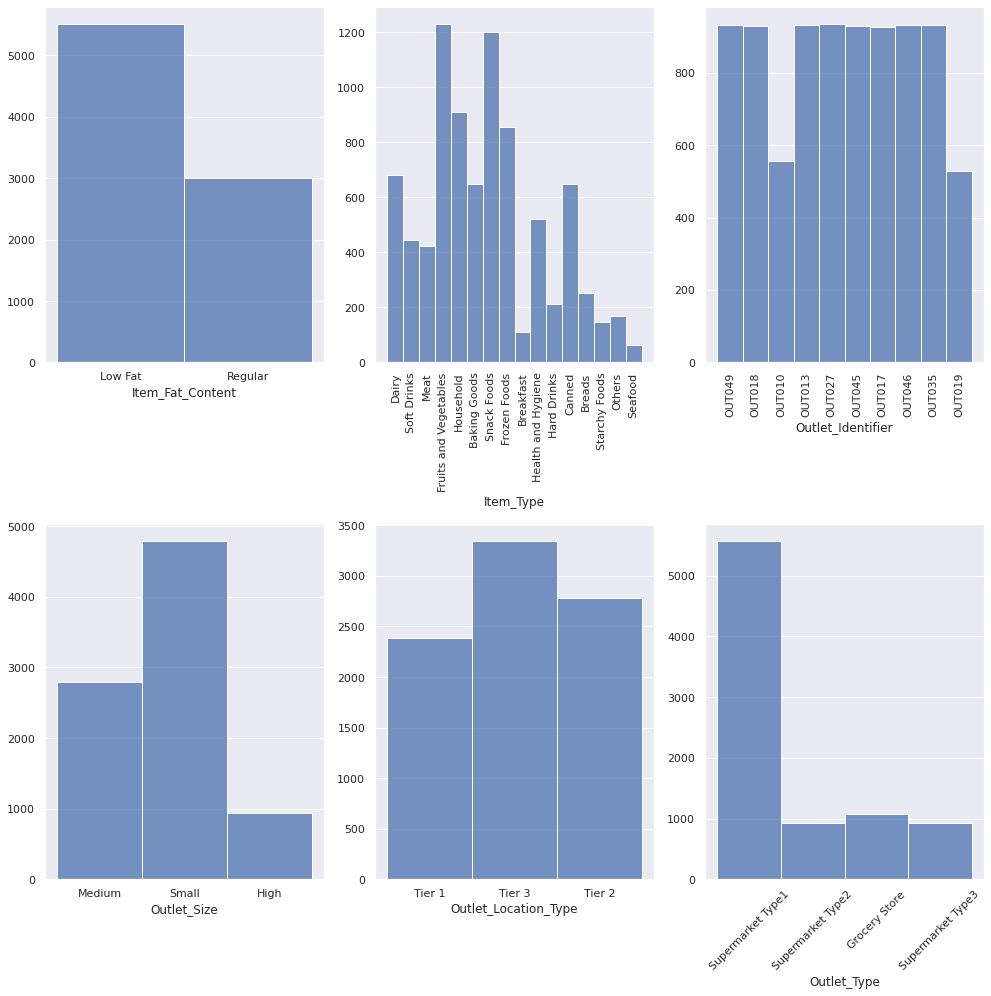

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,14)})

fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=3)

a=sns.histplot(df['Item_Fat_Content'],ax=axs[0,0])
b=sns.histplot(df['Item_Type'],ax=axs[0,1])
c=sns.histplot(df['Outlet_Identifier'],ax=axs[0,2])
d=sns.histplot(df['Outlet_Size'],ax=axs[1,0])
e=sns.histplot(df['Outlet_Location_Type'],ax=axs[1,1])
f=sns.histplot(df['Outlet_Type'],ax=axs[1,2])

graphs=[a,b,c,d,e,f]
for graph in graphs:
    graph.set(ylabel='') 
    graph.xaxis.grid(False)
b.tick_params(axis='x', rotation=90)
c.tick_params(axis='x', rotation=90)
f.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show




Analyzing the image above:

Item_Fat_Content-> most of the products are low fat

Item_Type-> most of the products are categorized as Fruits and vegetables,household, snaks Food and frozen foods

Outlet_Identifier-> all products are well distributed between all the stores

Outlet_Size-> More 50% of the are in small outlet

Location_Type->location is distributed even between the 3 tiers

Outlet_type-> more than 50% values are supermarket_type_1


The next part of the analysis will be for the numerical variables

<function matplotlib.pyplot.show>

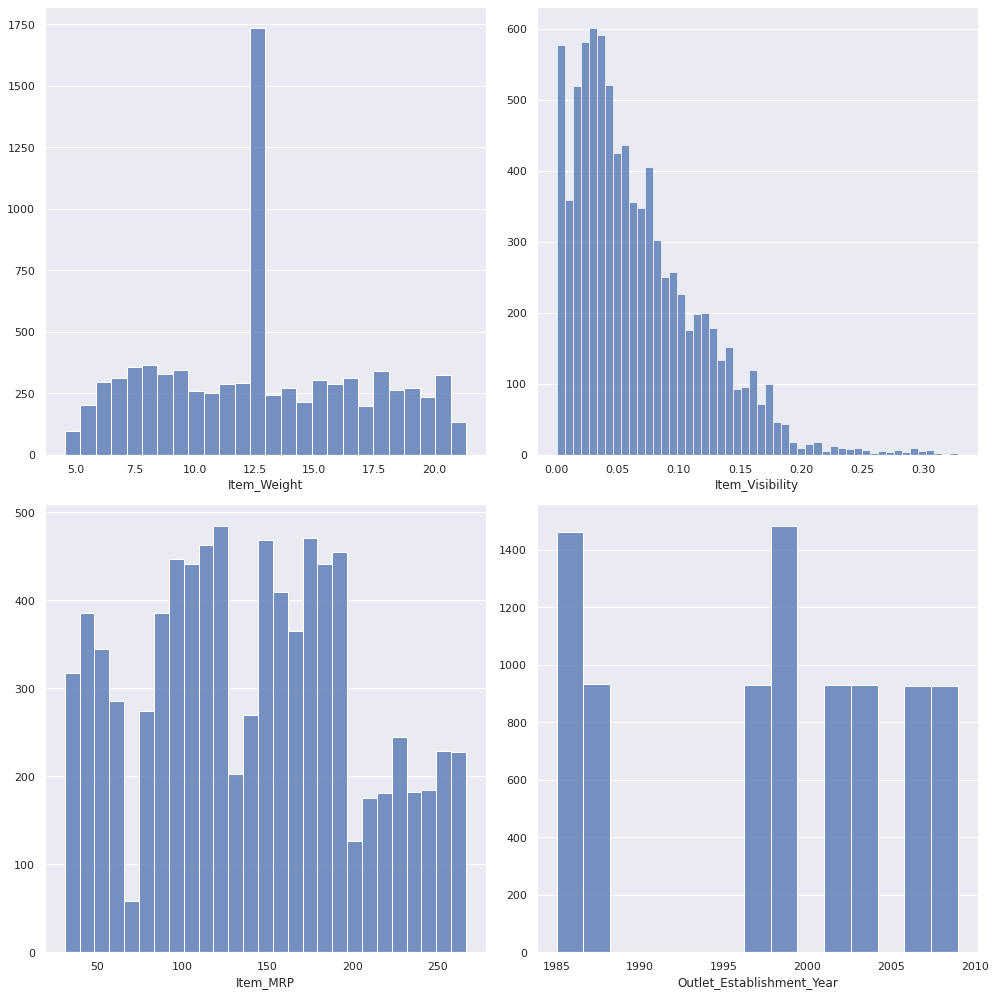

In [ ]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=2)

a=sns.histplot(df['Item_Weight'],ax=axs[0,0])
b=sns.histplot(df['Item_Visibility'],ax=axs[0,1])
c=sns.histplot(df['Item_MRP'],ax=axs[1,0])
d=sns.histplot(df['Outlet_Establishment_Year'],ax=axs[1,1])

graphs=[a,b,c,d]
for graph in graphs:
    graph.set(ylabel='') 
    graph.xaxis.grid(False)


fig.tight_layout()
plt.show

Item_Weight-> is distributed even except for a value around 12.5 that is the most repeated value (following a "normal" dsitribution")

Item_Visibility is skewed right meaning that most of the produts have a low visibility

Max Retail Price-> more or less even distribution of prices'

Year->not a lot to describe from the year variable it can be consider a categorical variable

Box plots of Numerical Variables

<function matplotlib.pyplot.show>

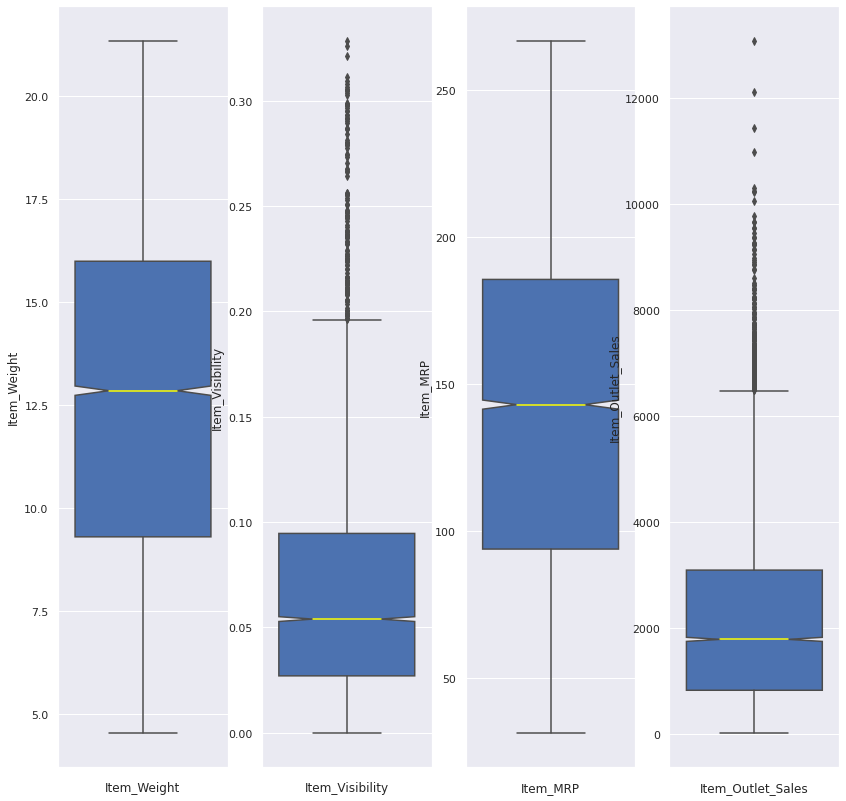

In [ ]:
fig, axs2 = plt.subplots(1,4,squeeze=False)
a=sns.boxplot( y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,0])
b=sns.boxplot( y='Item_Visibility', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,1])
c=sns.boxplot( y='Item_MRP', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,2])
d=sns.boxplot( y='Item_Outlet_Sales', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           ax=axs2[0,3])


a.set(xlabel='Item_Weight',)
b.set(xlabel='Item_Visibility',)
c.set(xlabel='Item_MRP',)
d.set(xlabel='Item_Outlet_Sales',)
plt.show

Looking at the box plots, the previous analysis with the histograms can be confirmed.

Item Weight media is around 12.5, there are lot of outliers in item visibility causing the skewed rigth. 

Quick Boxplots comibining categorical and numerical value

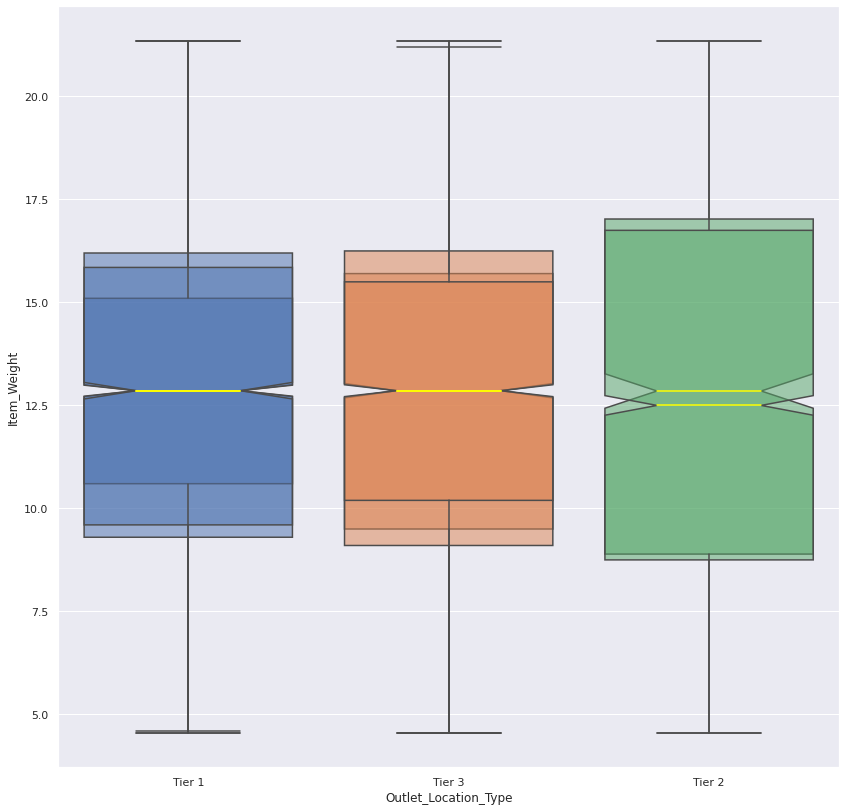

In [ ]:
a=sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )

b=sns.boxplot(x='Outlet_Size', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )
c=sns.boxplot(x='Outlet_Location_Type', y='Item_Weight', data=df,
           saturation=5,
           notch=True,
           medianprops=dict(color="yellow", alpha=2),
           )
list2=[a,b,c]

for x in list2:
  for patch in x.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))


Witht the above boxplot,nothing new is found same distribution is followed

Heated Maps

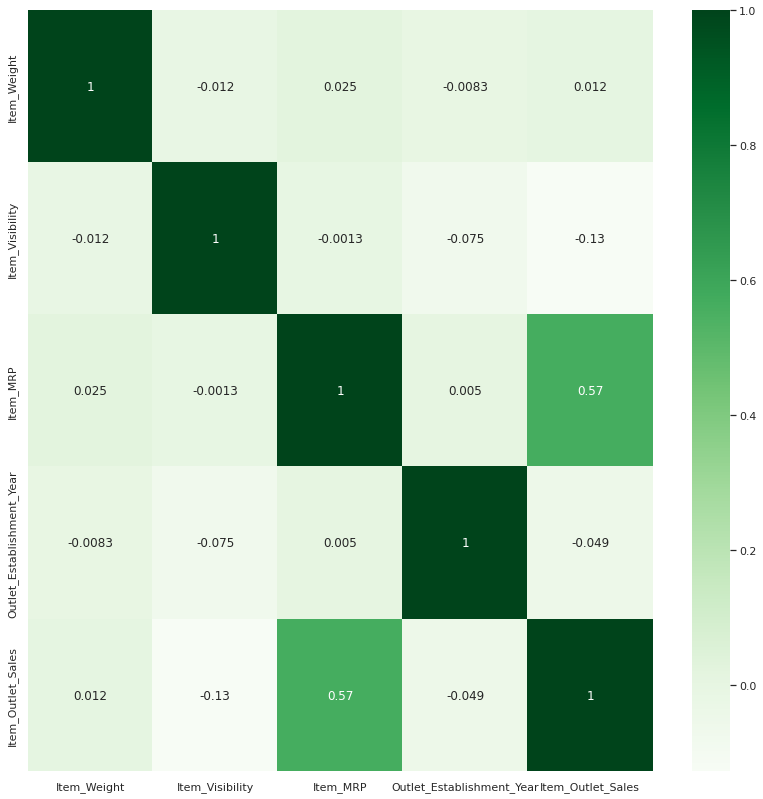

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

The only correlation is between Max Retail price and the Outlet Sales, which doesn't tell a lot because it is kind of obvious that if the price increase the sales will go up.

#Week 4

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data.

The first part of this analysis will be the Outlet properties

<function matplotlib.pyplot.show>

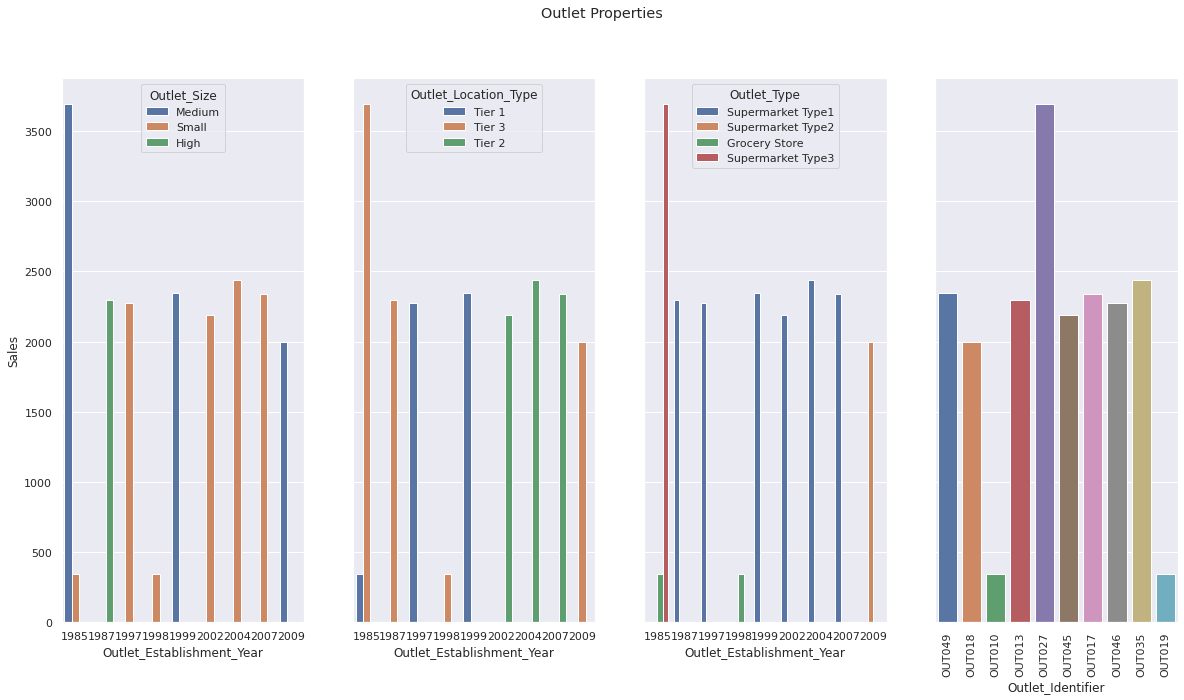

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

fig, axs = plt.subplots(squeeze=False,nrows=1,ncols=4,sharey=True)

a=sns.barplot(data=df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales",hue='Outlet_Size',ci=None,ax=axs[0,0])
b=sns.barplot(data=df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales",hue='Outlet_Location_Type',ci=None,ax=axs[0,1])
c=sns.barplot(data=df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales",hue='Outlet_Type',ci=None,ax=axs[0,2])
d=sns.barplot(data=df,x="Outlet_Identifier",y="Item_Outlet_Sales",ci=None,ax=axs[0,3])
fig.suptitle('Outlet Properties')
a.set(ylabel='Sales')
b.set(ylabel='')
c.set(ylabel='')
d.set(ylabel='')

d.tick_params(axis='x', rotation=90)
#c.tick_params(axis='x', rotation=90)
#f.tick_params(axis='x', rotation=90)

plt.show

Analyzin the graphs above. We can infered that in the last years the revenue came from Medium and Small Outlets in Tier 2 and 3 locations using supermarkets type 1 and 2.

The Outlet with the max amount of Sales is actually the oldest one established OUT027.

The next part of the analysis will be for Product Properties

<function matplotlib.pyplot.show>

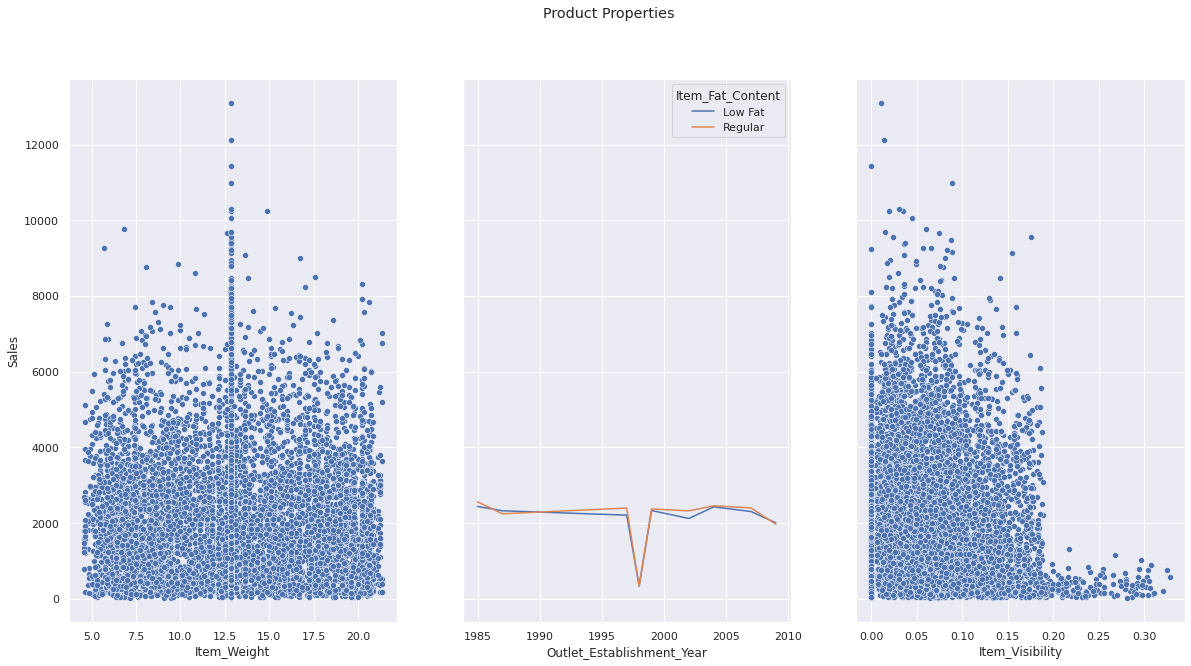

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

fig, axs = plt.subplots(squeeze=False,nrows=1,ncols=3,sharey=True)

a=sns.scatterplot(data=df,x="Item_Weight",y="Item_Outlet_Sales",ax=axs[0,0])
b=sns.lineplot(data=df,hue="Item_Fat_Content",y="Item_Outlet_Sales",x='Outlet_Establishment_Year',ci=None,ax=axs[0,1])
c=sns.scatterplot(data=df,x="Item_Visibility",y="Item_Outlet_Sales",ax=axs[0,2])


fig.suptitle('Product Properties')
a.set(ylabel='Sales')
b.set(ylabel='')
c.set(ylabel='')
d.set(ylabel='')

d.tick_params(axis='x', rotation=90)
#c.tick_params(axis='x', rotation=90)
#f.tick_params(axis='x', rotation=90)

plt.show

Folling the plots about it can be infered that neither Item_Weight of Fat_Cotent are charactericts that have a significant roles increasing sales.
In the other hand for Item_Visibility we can relate that a higher visibility doesn't more sales. The kind of products that are being sold doesn't need high visibility.

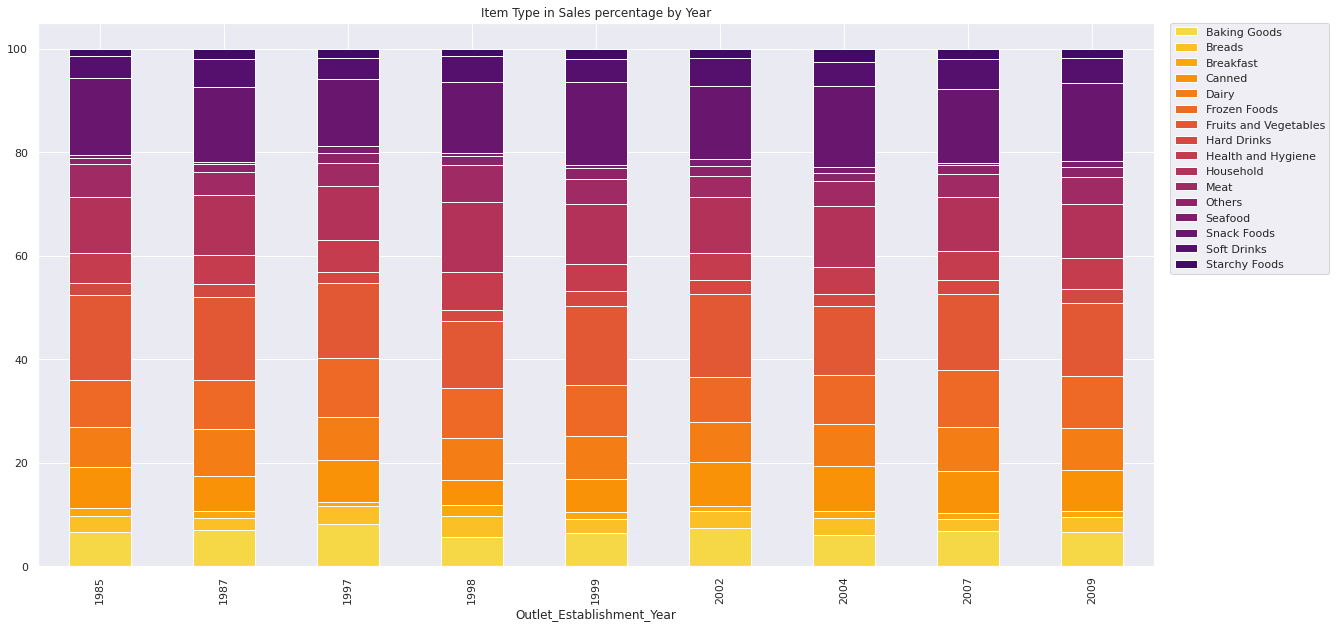

In [ ]:
from matplotlib import cm
import numpy as np

g1=df.groupby(['Outlet_Establishment_Year','Item_Type'])['Item_Outlet_Sales'].sum().unstack("Item_Type")
g2=g1.div(g1.sum(axis=1),axis=0)*100
my_colors =cm.inferno_r(np.linspace(.1, .8, 16))
g2.plot.bar(stacked=True,color=my_colors)
plt.legend(bbox_to_anchor =(1.01, 1.01));
plt.title('Item Type in Sales percentage by Year');

With the stacked bar plot above the item types that have the bigger percentage on sales are: Frozen Foods, Fruits and Vegetables, Snacks Foods, Household. 

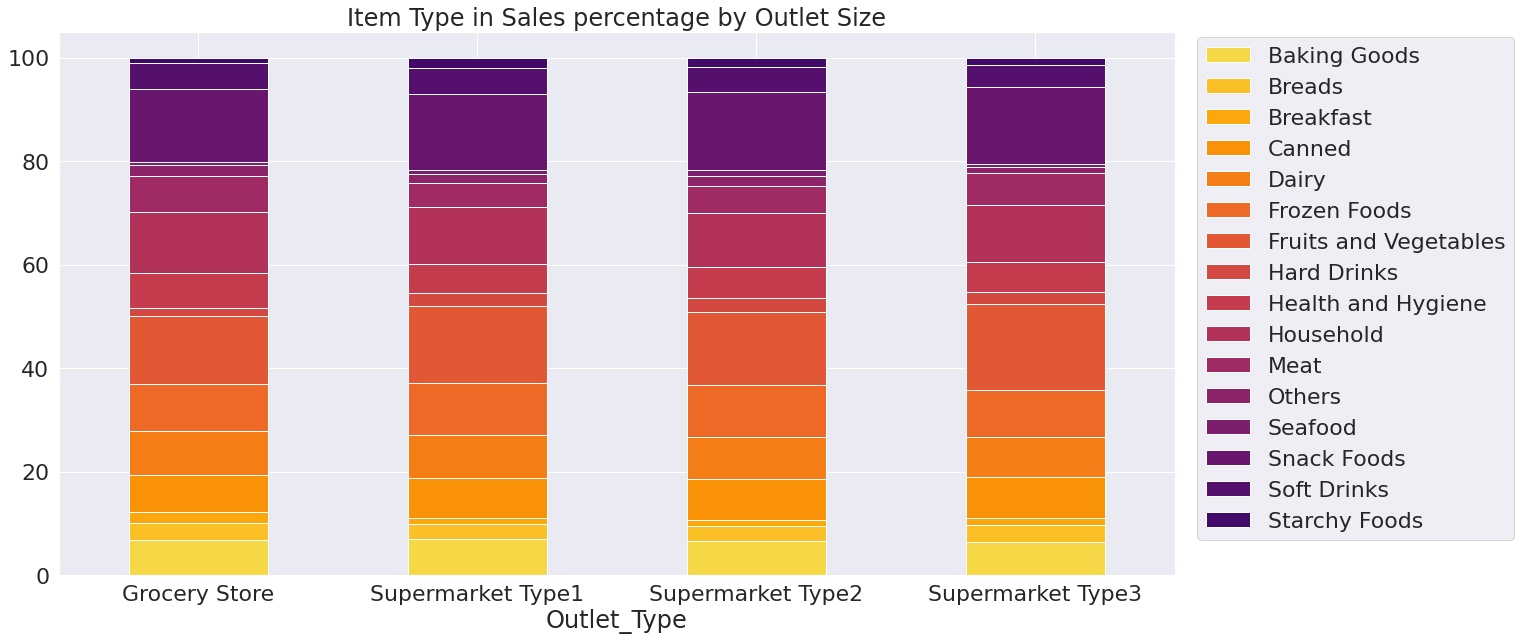

In [ ]:
g1=df.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].sum().unstack("Item_Type")
g2=g1.div(g1.sum(axis=1),axis=0)*100
my_colors =cm.inferno_r(np.linspace(.1, .8, 16))
g2.plot.bar(stacked=True,color=my_colors)
plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor =(1.01, 1.01));
plt.title('Item Type in Sales percentage by Outlet Size');

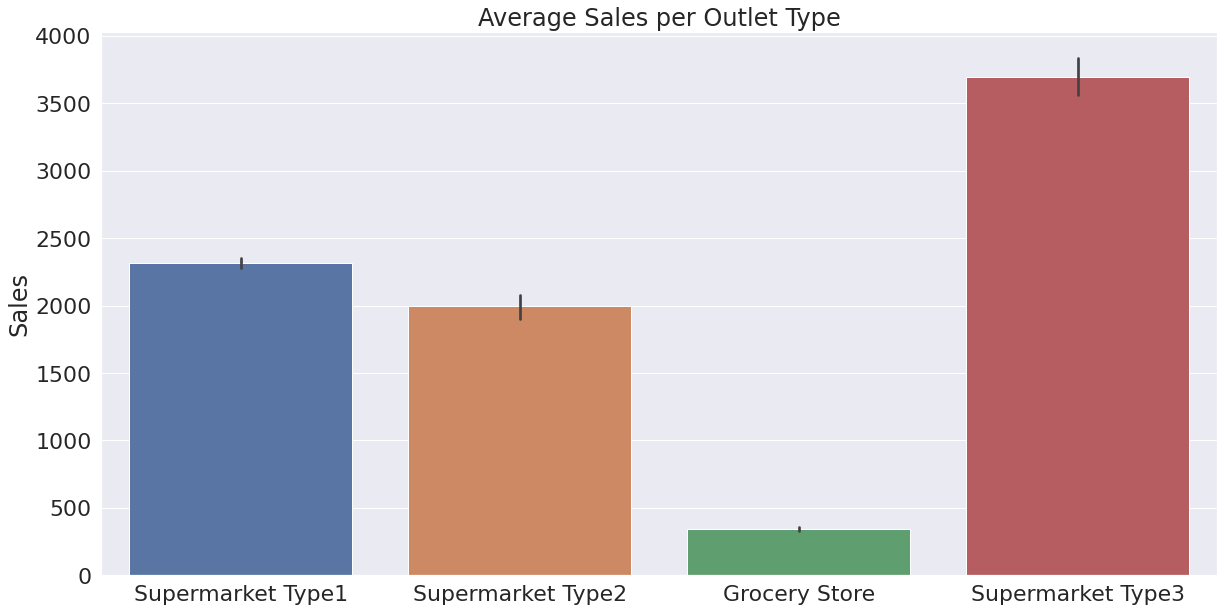

In [ ]:
barplot1=sns.barplot(x="Outlet_Type",y='Item_Outlet_Sales',data=df)
barplot1.set(title='Average Sales per Outlet Type');
barplot1.set(ylabel='Sales')
barplot1.set(xlabel='')
barplot1.tick_params(axis='x', rotation=0)
sns.set(font_scale = 2)
fig.tight_layout()
plt.savefig('Average_Sale.png', dpi = 300)

#Week 5

The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

In [ ]:
#Adding libraries needed to create the model
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df_week5.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Udpating typos in Item_Fat_Content for a correct model construction.

In [ ]:
#Correct naming convention for Item_Fat_Content
def renaming(word):
  if (word=="LF"):
      return "Low Fat"
  elif (word=="low fat"):
      return "Low Fat"
  elif  word=="reg":
      return "Regular"
  else:
      return word


df_week5['Item_Fat_Content'] = df_week5.apply(lambda x: renaming(x['Item_Fat_Content']),axis=1)

Defining target and features

y= Outlet Sales

X= All variables except Item_Identifier, Outlet_Identifier, Item_Weight, Outlet_Establishment_Year, Item_weight

The first 2 features represent ID for products and outlet, therefore they will no be included.

In [ ]:
y=df_week5['Item_Outlet_Sales']
X=df_week5.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Item_Weight','Outlet_Establishment_Year'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Numerical Features

Item_Weight, Item_Visibility, Item_MRP,Outlet_Establishment_Year

Nominal Features

Item_Fat_Content, Item_Type, Outlet_Size,	Outlet_Location_Type,	Outlet_Type




Creating transformer for missing values in data

In [ ]:
#Colum Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#Instantiate Transformers
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

Creating pipelines for numeric and categorical columns

In [ ]:
#Pipeline 1
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

Processor for both pipelines

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3f50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3ad0>)])

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3f50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3ad0>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


Checking tha the data doesn't have any missing values

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 30)




#Week 6

Item_weight and Establishment were dropped as well because the correlation in the heated map is low between those variables and the target

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Function to evaluate MAE,MSE, RMSE and R2

In [ ]:
def eval_regression(true, pred):
  mae = round(mean_absolute_error(true, pred),2)
  mse = round(mean_squared_error(true, pred),2)
  rmse = round(np.sqrt(mse),2)
  r2 = round(r2_score(true, pred),2)

  print(f'MAE {mae}\nMSE {mse}\nRMSE: {rmse}\nR^2: {r2} \n')

Linear Regression Model

In [ ]:
# instantiate a linear regression model
reg = LinearRegression()

# combine the preprocessor object and the linear regression model in a pipeline
regression = make_pipeline(preprocessor, reg)


# fit your pipe on the training data
regression.fit(X_train, y_train)


train_pred_reg= regression.predict(X_train)
test_pred_reg = regression.predict(X_test)



print(f'Linear Regression Model\n')


print(f'Test Data Regression')
eval_regression(y_test,test_pred_reg)

print(f'Train Data Regression')
eval_regression(y_train,train_pred_reg)


Linear Regression Model

Test Data Regression
MAE 805.76
MSE 1198207.04
RMSE: 1094.63
R^2: 0.57 

Train Data Regression
MAE 847.26
MSE 1300395.1
RMSE: 1140.35
R^2: 0.56 



In [ ]:
regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3f50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3ad0>)])),
                ('linearregression', LinearRegression())])

The linear regression model has a RMSE of 1k and a R^2 of .57 in the test data. Following the boxplot of the sales where the median is $2k it is an acceptable model.

Regression Tree Model

Setting up Decision Tree to calculate max depth 

In [ ]:
dectr = DecisionTreeRegressor(random_state = 42,max_depth=None)

dec_tree=make_pipeline(preprocessor,dectr)

dec_tree.fit(X_train, y_train)

# What was the depth of our default tree?
maxdepth=dectr.get_depth()

In [ ]:
dec_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3f50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0e20c3ad0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

Tune up of of the regression tree

In [ ]:
# List of values to try for max_depth:
depths = list(range(1, maxdepth+1))
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
  dectr = DecisionTreeRegressor(random_state = 42,max_depth=depth)
  dec_tree=make_pipeline(preprocessor,dectr)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score

sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594747,0.603925
4,0.584005,0.582625
6,0.583674,0.614877
7,0.580366,0.625968
8,0.565333,0.641332


Best depth based in the R^2 is 5

Setting Up Tuned Model

In [ ]:
dectr = DecisionTreeRegressor(random_state = 42,max_depth=5)

dec_tree=make_pipeline(preprocessor,dectr)

dec_tree.fit(X_train, y_train)

train_pred_dec1= dec_tree.predict(X_train)
test_pred_dec1 = dec_tree.predict(X_test)



print(f'Regression Tree Model\n')

print(f'Test Data')
eval_regression(y_test,test_pred_dec1)
print(f'Train Data')
eval_regression(y_train,train_pred_dec1)

Regression Tree Model

Test Data
MAE 738.34
MSE 1118083.68
RMSE: 1057.39
R^2: 0.59 

Train Data
MAE 762.58
MSE 1172164.97
RMSE: 1082.67
R^2: 0.6 



The regression tree model has a RMSE of 1k and a R^2 of .59 in the test data. The results are similar to the Linear regression model, the difference in RMSE is 37.24 dollars.

#Recommendation

The model selected for this project is the Decision Tree Model, because it has the best RMSE and R^2 when used in the test dataset.